# Import libraries

In [34]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import torchvision.datasets as datasets
from skimage import io
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
import time
from PIL import Image
from torch.autograd import Variable
import random
import matplotlib.pyplot as plt

In [35]:
torch.cuda.is_available()

True

In [36]:
# torch.cuda.memory_summary(device=0, abbreviated=False)

In [37]:
torch.cuda.empty_cache()

# Parameters

In [38]:
input_size=784     #Number of input neurons(image pixels)
hidden_size=400    #Number of hidden neurons
out_size=10        #Number of classes(0-90
epochs=20          #How many times we pass our entire dataset into our network
batch_size=100    #Her bir iterasyonda alınan data sayısı
learning_rate=0.01

# Download the Dataset

In [39]:
# Prepare the transform structures to apply dataset

# To apply the transformation,we'll use standardization
# Standardization is a normalization technique which makes the mean to zero and std to 1.

# The mean and std of the dataset is known before.


transforms=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

# Download the dataset

train_dataset=datasets.CIFAR10(root='./cifar10',
                            train=True,
                            transform=transforms,
                            download=True)

test_dataset=datasets.CIFAR10(root='./cifar10',
                           train=False,
                           transform=transforms)




Files already downloaded and verified


In [40]:
classes=('plane','car','bird','cat','deer','dog',
        'frog','horse','ship','truck')

In [41]:
classes[0]

'plane'

In [42]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [10]:
train_dataset.transforms

StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [11]:
train_dataset.data #It shows the original data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
len(train_dataset),len(test_dataset)

(50000, 10000)

In [13]:
train_dataset[20][0] # It is converted into tensor

tensor([[[ 0.2000,  0.3647,  0.2157,  ..., -0.0431,  0.0824, -0.2392],
         [ 0.2549,  0.2863,  0.1765,  ...,  0.0745,  0.2549, -0.1922],
         [ 0.0980,  0.1529,  0.0667,  ..., -0.1843, -0.0196, -0.2706],
         ...,
         [ 0.3725,  0.3333,  0.3333,  ...,  0.5137,  0.5451,  0.5608],
         [ 0.3647,  0.3569,  0.3412,  ...,  0.5686,  0.5843,  0.6314],
         [ 0.3176,  0.2863,  0.3020,  ...,  0.6000,  0.6000,  0.6157]],

        [[ 0.2314,  0.4118,  0.2941,  ..., -0.0196,  0.1216, -0.2078],
         [ 0.2784,  0.3333,  0.2471,  ...,  0.0588,  0.2627, -0.1451],
         [ 0.1216,  0.1922,  0.1373,  ..., -0.1922,  0.0039, -0.2000],
         ...,
         [ 0.3882,  0.3490,  0.3490,  ...,  0.5922,  0.6157,  0.6000],
         [ 0.3882,  0.3804,  0.3647,  ...,  0.6314,  0.6392,  0.6627],
         [ 0.3569,  0.3255,  0.3412,  ...,  0.6392,  0.6314,  0.6471]],

        [[ 0.2157,  0.4745,  0.3490,  ..., -0.0353,  0.1059, -0.2392],
         [ 0.2941,  0.4118,  0.3255,  ...,  0

In [14]:
train_dataset[20][1]

4

# Visualize random image

random_img.size(): torch.Size([3, 32, 32])
random_img.shape np.array:  (32, 32, 3)


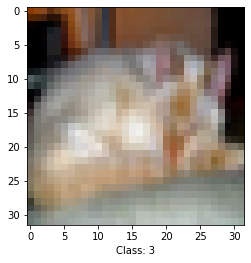

In [15]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

random_num=random.randint(0,len(train_dataset))

random_img=train_dataset[random_num][0]
print('random_img.size():',random_img.size())
random_img_label=train_dataset[random_num][1]

#To show the image , convert torch.tensor to np.array

random_img=random_img.numpy()*0.5+0.5

#Numpy array read the images as (H x W x Ch)
#random_img=np.reshape(random_img,(32,32,3))
random_img=np.transpose(random_img, (1, 2, 0))

print('random_img.shape np.array: ',random_img.shape)

plt.xlabel("Class: "+str(random_img_label))
plt.imshow(random_img)


# Load the Dataset

In [43]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                       batch_size=batch_size,
                                       shuffle=True)

In [44]:
len(train_loader),len(test_loader)

(500, 100)

# Visualize random image with batches

In [21]:
"""
plt.figure(figsize=(48,20))

for i in range(batch_size):
    plt.subplot(10,10,i+1)
    t_loader=iter(train_loader)  #t_loader.next().size() -> (100,1,28,28)
    
    images,labels=t_loader.next()


    img=images[i] #i between 0-100 except 100
    label=labels[i].item()
    
    #Convert tensor to np.array to show
    img=img.numpy()*stddev_gray+mean_gray
    img=np.reshape(img,(28,28))
    
    plt.ylabel("Number "+str(label))
    plt.imshow(img,cmap="gray")

print('images.shape: ',images.shape)
print('labels.shape: ',labels.shape)
    """

'\nplt.figure(figsize=(48,20))\n\nfor i in range(batch_size):\n    plt.subplot(10,10,i+1)\n    t_loader=iter(train_loader)  #t_loader.next().size() -> (100,1,28,28)\n    \n    images,labels=t_loader.next()\n\n\n    img=images[i] #i between 0-100 except 100\n    label=labels[i].item()\n    \n    #Convert tensor to np.array to show\n    img=img.numpy()*stddev_gray+mean_gray\n    img=np.reshape(img,(28,28))\n    \n    plt.ylabel("Number "+str(label))\n    plt.imshow(img,cmap="gray")\n\nprint(\'images.shape: \',images.shape)\nprint(\'labels.shape: \',labels.shape)\n    '

In [45]:
t_loader=iter(train_loader)
images,labels=t_loader.next()
images.shape,labels.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

# Build the CNN Model

In [46]:
from torchsummary import summary
import torch.nn.functional as F

In [1]:
print(images.shape)
conv2d=nn.Conv2d(3,8,kernel_size=3,padding=1) #stride default=0,pad default=0
y=conv2d(images)
print(y.shape)

batchnorm=nn.BatchNorm2d(8)
y=batchnorm(y)
print(y.shape)

maxpool=nn.MaxPool2d(kernel_size=2)
y=maxpool(y)
print(y.shape)

conv2d=nn.Conv2d(8,32,kernel_size=5,stride=1,padding=2)
y=conv2d(y)
print(y.shape)

batchnorm=nn.BatchNorm2d(32)
y=batchnorm(y)
print(y.shape)

maxpool=nn.MaxPool2d(kernel_size=2)
y=maxpool(y)
print(y.shape)

y=y.view(-1,y.size(1)*y.size(2)*y.size(3))
print(y.shape)

y.flatten().shape



NameError: name 'images' is not defined

In [48]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model,self).__init__()
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,padding=1,stride=1)
        self.batchNorm=nn.BatchNorm2d(num_features=8)
        self.maxPool=nn.MaxPool2d(kernel_size=2)
        
        self.conv2=nn.Conv2d(in_channels=8,out_channels=32,kernel_size=5,padding=2,stride=1)
        self.batchNorm2=nn.BatchNorm2d(num_features=32)
        
        self.fc1=nn.Linear(in_features=32*8*8,out_features=200)
        self.dropout=nn.Dropout(0.5)
        self.fc2=nn.Linear(in_features=200,out_features=10)

        
    
    def forward(self,x):
        inp=self.conv1(x)
        x=F.relu(self.batchNorm(inp))
        x=self.maxPool(x)
        
        x=self.conv2(x)
        x=F.relu(self.batchNorm2(x))
        x=self.maxPool(x)
        
        x=x.view(-1,32*8*8)
        
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        
        x=self.fc2(x)
        
        return x
        
        

# Select GPU and extract the model

In [49]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=CNN_Model().to(torch.device(device))

model

CNN_Model(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchNorm): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxPool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batchNorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2048, out_features=200, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

In [50]:
print(model.conv1)
print(model.conv2)
print(model.conv1.weight.shape) # input->1 filtre-out->8 tane filtre ve 3 x 3 kernel
print(model.conv2.weight.shape) # input->8 filtre-out->32 tane filtre ve 5 x 5 kernel



Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
torch.Size([8, 3, 3, 3])
torch.Size([32, 8, 5, 5])


In [51]:
summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
       BatchNorm2d-2            [-1, 8, 32, 32]              16
         MaxPool2d-3            [-1, 8, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]           6,432
       BatchNorm2d-5           [-1, 32, 16, 16]              64
         MaxPool2d-6             [-1, 32, 8, 8]               0
            Linear-7                  [-1, 200]         409,800
           Dropout-8                  [-1, 200]               0
            Linear-9                   [-1, 10]           2,010
Total params: 418,546
Trainable params: 418,546
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.28
Params size (MB): 1.60
Estimated Total Size (MB): 1.89
-------------------------------------------

In [29]:
for m in model.parameters():
    print(m.size())
    break

torch.Size([8, 3, 3, 3])


# Select loss fn and optimizer

In [52]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

# Training the Model

In [53]:
import time

start=time.time()

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]

for epoch in range(epochs):
    n_correct=0
    batch_loss=0.0
    batch_iter=0
    
    for i,(images,labels) in enumerate(train_loader):
        # Select the device to process
        images=images.to(device)
        labels=labels.to(device)
        
        # Forward pass - prediction
        output=model(images)
        
        # Compute loss value
        loss_val=loss_fn(output,labels)
        batch_loss+=loss_val.item()
        
        # Set zero the gradients of the optimizer
        optimizer.zero_grad()
        
        # Backward pass
        loss_val.backward()
        
        # Update weights 
        optimizer.step()
        
        # Get predicted results
        _,pred=torch.max(output,1)
        n_correct+=(pred==labels).sum().item()
        
        batch_iter+=1
        
    train_loss.append(batch_loss/batch_iter)
    train_acc.append(100*n_correct/len(train_dataset))
    
    
    # Testing process
    
    n_correct=0
    batch_loss=0.0
    batch_iter=0
        
    model.eval()
        
    with torch.no_grad():
        for i,(images,labels) in enumerate(test_loader):
            images=images.to(device)
            labels=labels.to(device)

            #Forward pass - prediction
            output=model(images)

            #Compute loss value
            loss_val=loss_fn(output,labels)
            batch_loss+=loss_val.item()

            #Get predicted results
            _,pred=torch.max(output,1)
            n_correct+=(pred==labels).sum().item()

            batch_iter+=1

        test_loss.append(batch_loss/batch_iter)
        test_acc.append(100*n_correct/len(test_dataset))
    
        print("Epoch {}/{}, Training Loss: {:.3f}, Training Acc: {:.3f}, Testing Loss: {:.3f},Testing Acc: {:.3f}".format(
                epoch+1,epochs,train_loss[-1],train_acc[-1],test_loss[-1],test_acc[-1]))  
            
        
end=time.time()        
print("Training Duration:",end-start)
    
    
        

Epoch 1/20, Training Loss: 2.202, Training Acc: 17.100, Testing Loss: 1.881,Testing Acc: 29.890
Epoch 2/20, Training Loss: 1.473, Training Acc: 44.060, Testing Loss: 1.314,Testing Acc: 52.170
Epoch 3/20, Training Loss: 1.217, Training Acc: 55.852, Testing Loss: 1.219,Testing Acc: 56.210
Epoch 4/20, Training Loss: 1.127, Training Acc: 59.422, Testing Loss: 1.124,Testing Acc: 59.550
Epoch 5/20, Training Loss: 1.065, Training Acc: 61.784, Testing Loss: 1.112,Testing Acc: 59.810
Epoch 6/20, Training Loss: 1.025, Training Acc: 63.424, Testing Loss: 1.098,Testing Acc: 61.130
Epoch 7/20, Training Loss: 0.985, Training Acc: 64.754, Testing Loss: 1.110,Testing Acc: 61.610
Epoch 8/20, Training Loss: 0.957, Training Acc: 65.942, Testing Loss: 1.112,Testing Acc: 61.210
Epoch 9/20, Training Loss: 0.935, Training Acc: 66.664, Testing Loss: 1.067,Testing Acc: 62.290
Epoch 10/20, Training Loss: 0.919, Training Acc: 67.156, Testing Loss: 1.082,Testing Acc: 62.900
Epoch 11/20, Training Loss: 0.894, Trai

# Plotting the loss

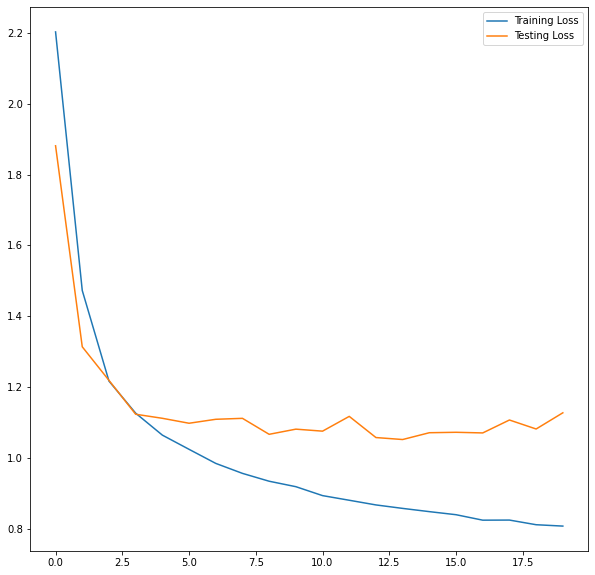

In [54]:
#Plotting the loss
f=plt.figure(figsize=(10,10))
plt.plot(train_loss,label="Training Loss")
plt.plot(test_loss,label="Testing Loss")
plt.legend()
plt.show()


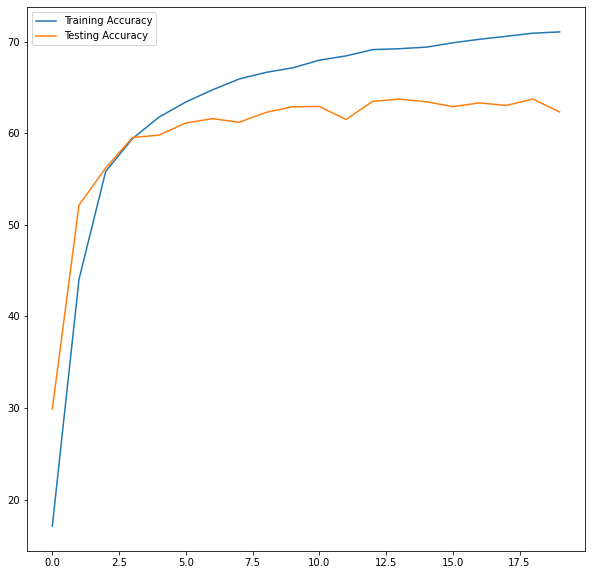

In [55]:
#Plotting the accuracy
f=plt.figure(figsize=(10,10))
plt.plot(train_acc,label="Training Accuracy")
plt.plot(test_acc,label="Testing Accuracy")
plt.legend()
plt.show()


# Save the Model

In [ ]:
torch.save(model,"myModel.pth")

# Save only the weights
torch.save(model.state_dict(),"myModel_weights.pth")

# Load the Model

In [ ]:
model=torch.load("myModel.pth")
model.eval()

# 2.yol
model=CNN_Model()
model.load_state_dict(torch.load("myModel.pth"))
model.eval()
